In [1]:
from astropy.io.votable import parse_single_table
import requests
from io import BytesIO
from astropy.time import Time
from specutils import SpectrumList
import re
import matplotlib.pyplot as plt


Code sourced from https://docs.datacentral.org.au/help-center/virtual-observatory-examples/ssa-accessing-original-spectra/

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     220   (4096,)   float64   
  1  normalized    1 ImageHDU       250   (4096,)   float64   
  2  relative_error    1 ImageHDU       250   (4096,)   float64   
  3  sky           1 ImageHDU       250   (4096,)   float64   
  4  teluric       1 ImageHDU       250   (4096,)   float64   
  5  scattered     1 ImageHDU       250   (4096,)   float32   
  6  cross_talk    1 ImageHDU       250   (4096,)   float64   
  7  resolution_profile    1 ImageHDU       250   (4096,)   float32   


        Use Spectrum instead. [warnings]


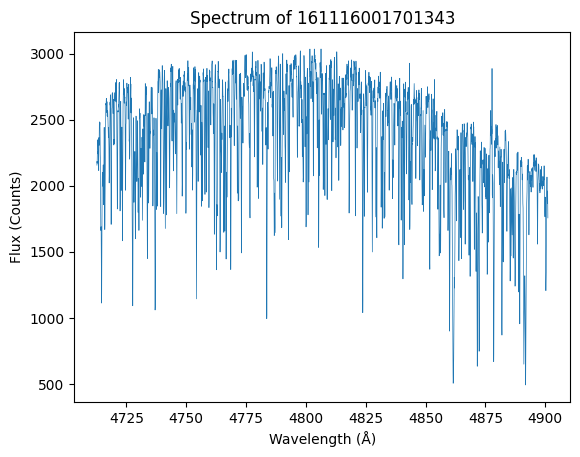

In [2]:
from astropy.io import fits
from specutils import Spectrum1D
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import requests
from io import BytesIO

# === Download and open FITS ===
url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&FILT=B&RESPONSEFORMAT=fits"  # replace with actual URL
spec = requests.get(url).content
hdul = fits.open(BytesIO(spec))

hdul.info()
header = hdul[0].header
flux = hdul[0].data

# === Build wavelength axis from WCS keywords if available ===
crval1 = header.get('CRVAL1')   # starting wavelength
cdelt1 = header.get('CDELT1')   # dispersion per pixel
crpix1 = header.get('CRPIX1', 1)  # reference pixel (default to 1)

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Create Spectrum1D object ===
spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux * u.count)

# === Plot ===
plt.plot(spectrum.spectral_axis, spectrum.flux, linewidth=0.5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Counts)")
plt.title("Spectrum of 161116001701343")
plt.show()


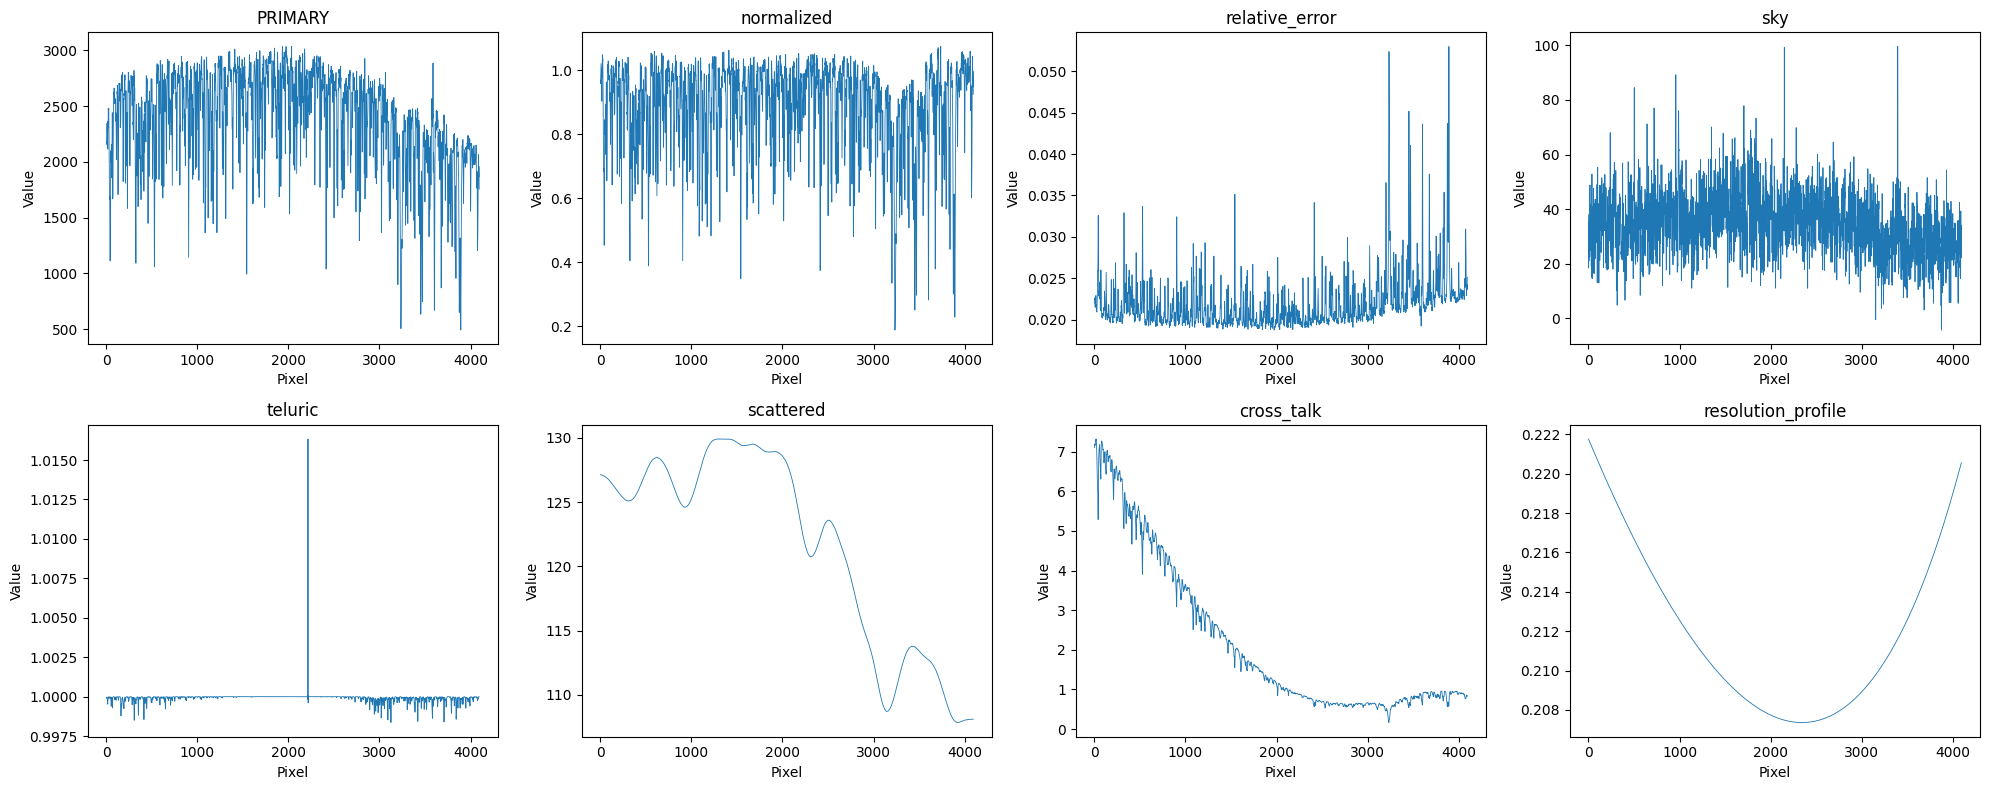

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import requests
from io import BytesIO

# === Download the FITS file ===
url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&FILT=B&RESPONSEFORMAT=fits"
response = requests.get(url)
hdul = fits.open(BytesIO(response.content))

# === Create plot ===
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# === Extension labels (HDU names) ===
ext_names = [
    "PRIMARY", "normalized", "relative_error", "sky",
    "teluric", "scattered", "cross_talk", "resolution_profile"
]

# === Plot each extension ===
for i in range(8):
    hdu = hdul[i]
    data = hdu.data
    ax = axes[i]

    # Only plot if data is 1D and not None
    if data is not None and data.ndim == 1:
        ax.plot(np.arange(len(data)), data, lw=0.6)
        ax.set_title(ext_names[i])
        ax.set_xlabel("Pixel")
        ax.set_ylabel("Value")
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(ext_names[i])
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()


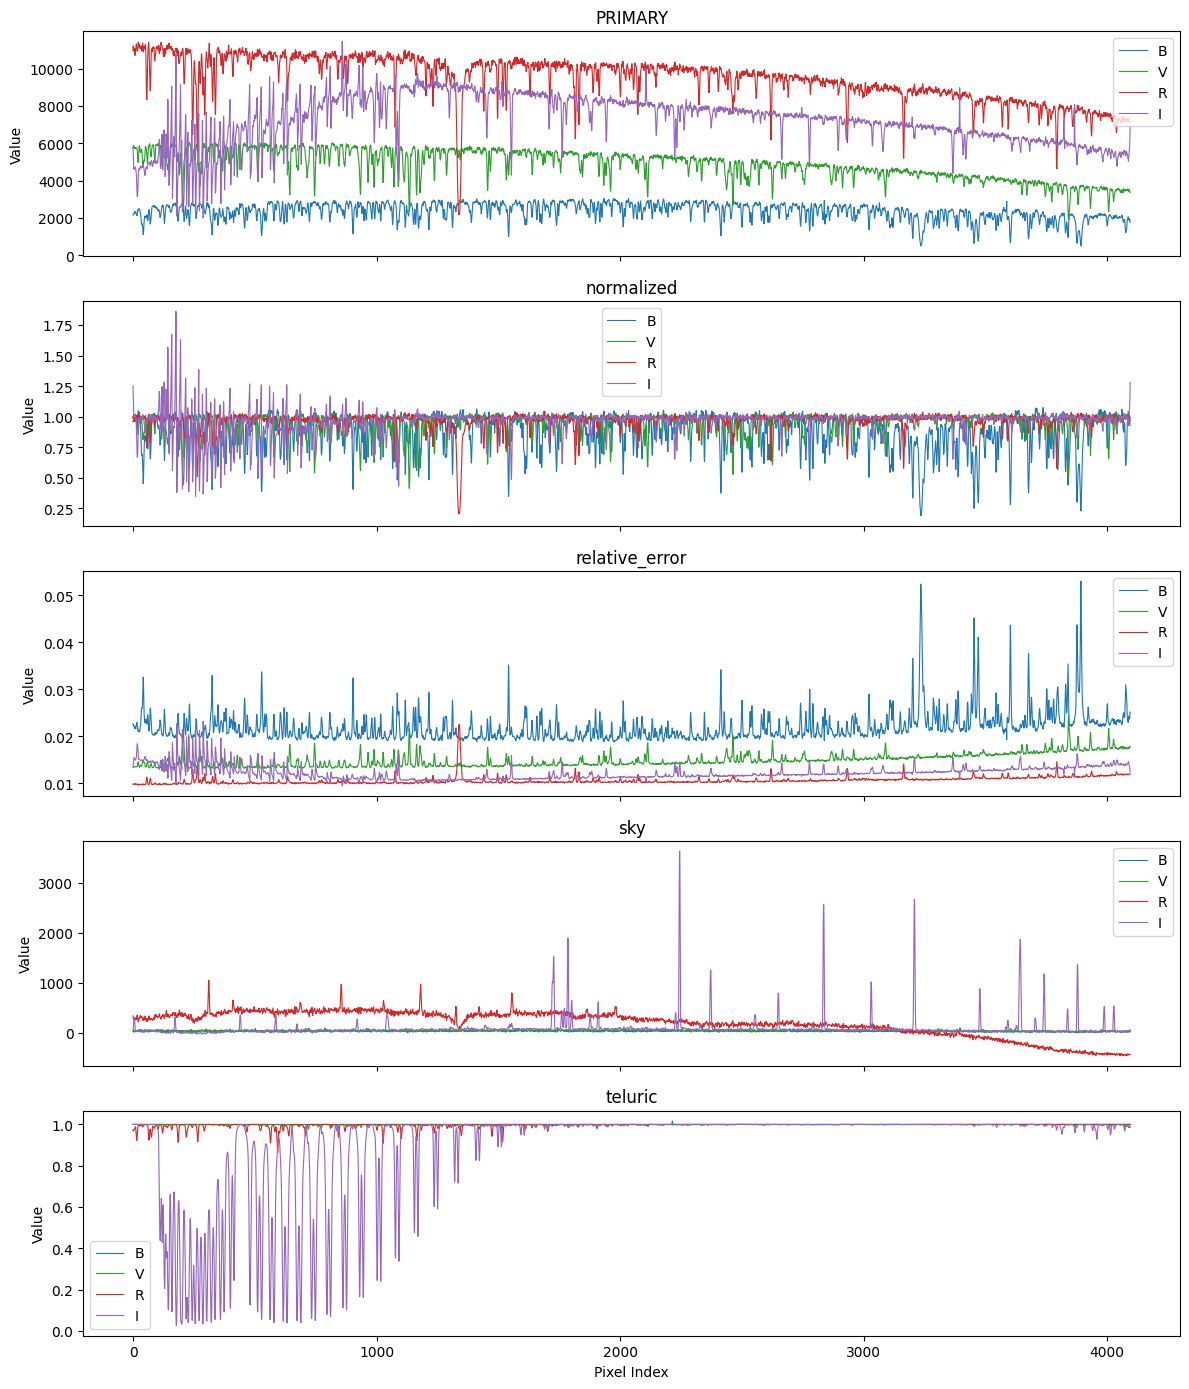

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import requests
from io import BytesIO

# === Setup ===
extensions_to_plot = ['PRIMARY', 'normalized', 'relative_error', 'sky', 'teluric']
filter_colors = {'B': '#1f77b4', 'V': '#2ca02c', 'R': '#d62728', 'I': '#9467bd'}
filters = ['B', 'V', 'R', 'I']
base_url = "https://datacentral.org.au/vo/slink/links"
ID = "161116001701343"
DR = "galah_dr4"

# === Plot Setup ===
fig, axes = plt.subplots(len(extensions_to_plot), 1, figsize=(12, 14), sharex=True)
axes = axes.flatten()

# === Download and plot each extension for each filter ===
for filt in filters:
    url = f"{base_url}?ID={ID}&DR={DR}&FILT={filt}&RESPONSEFORMAT=fits"
    response = requests.get(url)
    hdul = fits.open(BytesIO(response.content))
    
    for i, ext in enumerate(extensions_to_plot):
        hdu = hdul[ext] if ext != 'PRIMARY' else hdul[0]
        data = hdu.data

        if data is not None and data.ndim == 1:
            x = np.arange(len(data))
            axes[i].plot(x, data, label=filt, color=filter_colors[filt], linewidth=0.8)

# === Final touches ===
for i, ext in enumerate(extensions_to_plot):
    axes[i].set_ylabel("Value")
    axes[i].set_title(f"{ext}")
    axes[i].legend()

axes[-1].set_xlabel("Pixel Index")
plt.tight_layout()
plt.show()


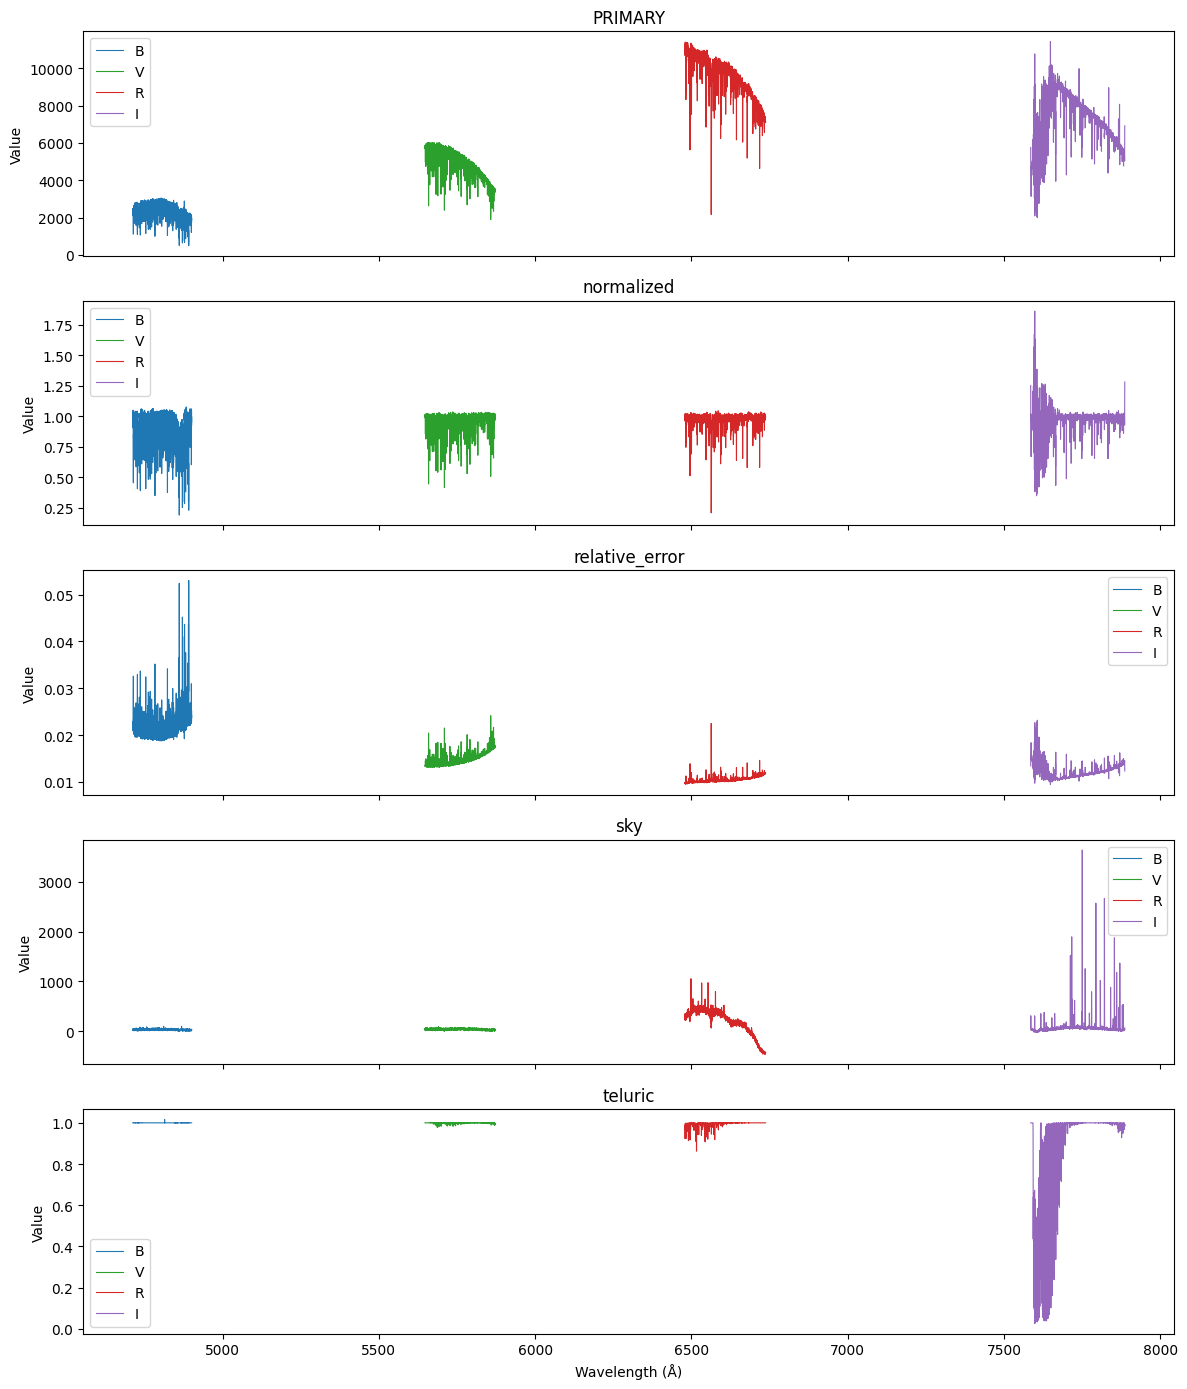

In [7]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import requests
from io import BytesIO

# === Setup ===
extensions_to_plot = ['PRIMARY', 'normalized', 'relative_error', 'sky', 'teluric']
filter_colors = {'B': '#1f77b4', 'V': '#2ca02c', 'R': '#d62728', 'I': '#9467bd'}
filters = ['B', 'V', 'R', 'I']
base_url = "https://datacentral.org.au/vo/slink/links"
ID = "161116001701343"
DR = "galah_dr4"

# === Plot Setup ===
fig, axes = plt.subplots(len(extensions_to_plot), 1, figsize=(12, 14), sharex=True)
axes = axes.flatten()

# === Download and plot each extension for each filter ===
for filt in filters:
    url = f"{base_url}?ID={ID}&DR={DR}&FILT={filt}&RESPONSEFORMAT=fits"
    response = requests.get(url)
    hdul = fits.open(BytesIO(response.content))
    
    for i, ext in enumerate(extensions_to_plot):
        hdu = hdul[ext] if ext != 'PRIMARY' else hdul[0]
        data = hdu.data
        hdr = hdu.header

        if data is not None and data.ndim == 1:
            # Extract wavelength solution from header
            crval = hdr.get('CRVAL1')
            cdelt = hdr.get('CDELT1')
            crpix = hdr.get('CRPIX1')

            if None not in (crval, cdelt, crpix):
                pixel_indices = np.arange(len(data))
                wavelengths = crval + (pixel_indices + 1 - crpix) * cdelt
                axes[i].plot(wavelengths, data, label=filt, color=filter_colors[filt], linewidth=0.8)
            else:
                print(f"Wavelength solution missing in extension '{ext}' for filter '{filt}'")

# === Final touches ===
for i, ext in enumerate(extensions_to_plot):
    axes[i].set_ylabel("Value")
    axes[i].set_title(f"{ext}")
    axes[i].legend()

axes[-1].set_xlabel("Wavelength (Å)")
plt.tight_layout()
plt.show()


        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]


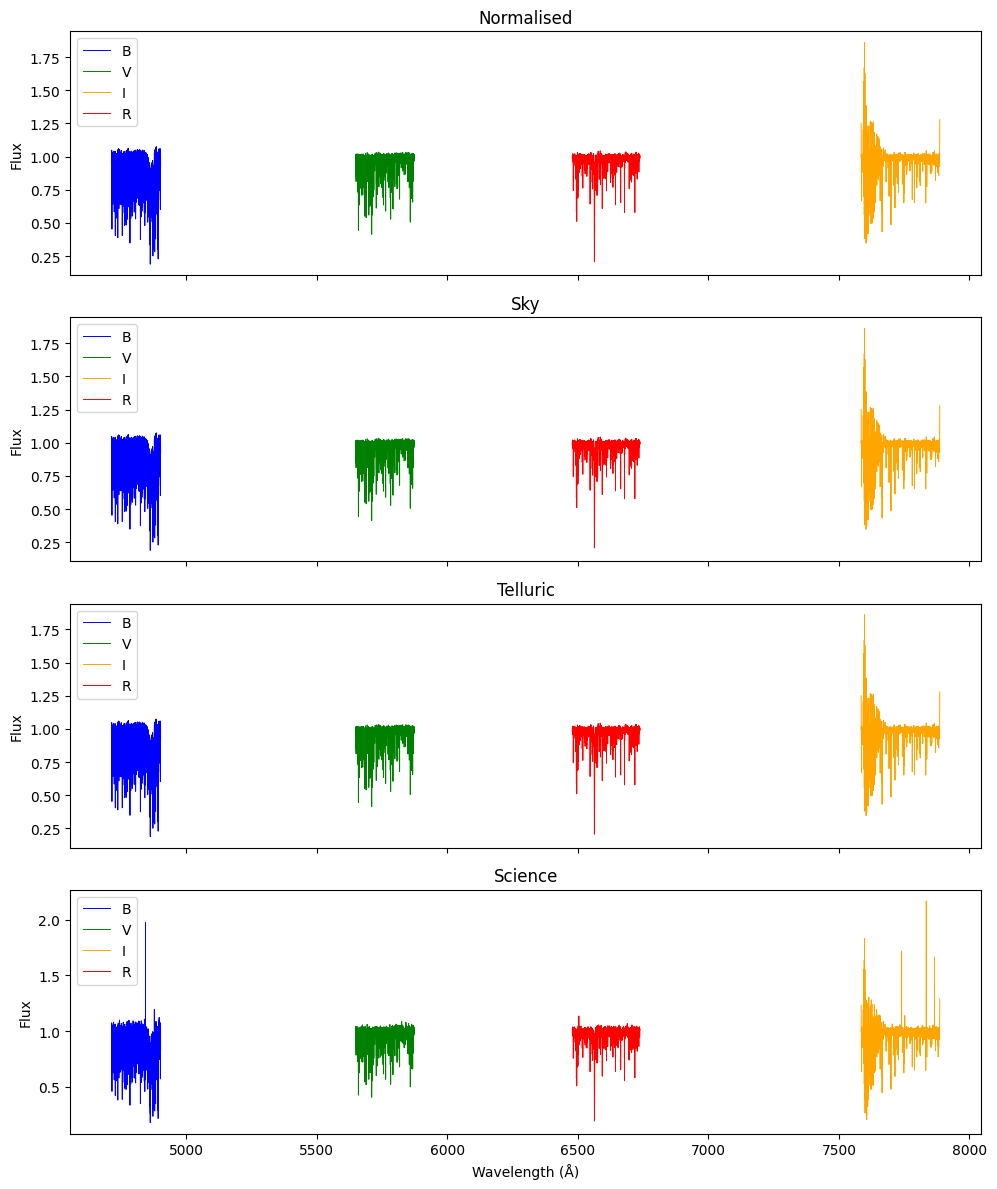

In [19]:
import matplotlib.pyplot as plt
from astropy.io import fits
from specutils import Spectrum1D
from astropy.visualization import quantity_support
from io import BytesIO
import requests

quantity_support()

# === SETTINGS ===
object_id = "161116001701343"
filters = ["B", "V", "I", "R"]
subtypes = ["normalised", "sky", "telluric", "science"]
titles = ["Normalised", "Sky", "Telluric", "Science"]
colors = {"B": "blue", "V": "green", "I": "orange", "R": "red"}

base_url = "https://datacentral.org.au/vo/slink/links"

# === SETUP PLOTS ===
fig, axs = plt.subplots(len(subtypes), 1, figsize=(10, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

# === LOOP THROUGH EACH DPSUBTYPE ===
for i, subtype in enumerate(subtypes):
    ax = axs[i]
    for filt in filters:
        url = (
            f"{base_url}?ID={object_id}&DR=galah_dr4&IDX=0"
            f"&FILT={filt}&DPSUBTYPE={subtype}&RESPONSEFORMAT=fits"
        )
        try:
            response = requests.get(url)
            response.raise_for_status()
            spec = Spectrum1D.read(BytesIO(response.content), format="wcs1d-fits")
            ax.plot(spec.wavelength, spec.flux, label=filt, color=colors[filt], lw=0.7)
        except Exception as e:
            print(f"Skipping {filt} / {subtype}: {e}")
            continue

    ax.set_title(titles[i])
    ax.set_ylabel("Flux")
    ax.legend()

axs[-1].set_xlabel("Wavelength (Å)")
plt.tight_layout()
plt.show()


https://datacentral.org.au/vo/slink/links?ID=170910004101116&DR=galah_dr4&IDX=0&FILT=B&DPSUBTYPE=Primary&RESPONSEFORMAT=fits


        Use Spectrum instead. [astropy.io.registry.core]


https://datacentral.org.au/vo/slink/links?ID=170910004101116&DR=galah_dr4&IDX=0&FILT=B&DPSUBTYPE=sky&RESPONSEFORMAT=fits


        Use Spectrum instead. [astropy.io.registry.core]


https://datacentral.org.au/vo/slink/links?ID=170910004101116&DR=galah_dr4&IDX=0&FILT=B&DPSUBTYPE=teluric&RESPONSEFORMAT=fits


        Use Spectrum instead. [astropy.io.registry.core]


https://datacentral.org.au/vo/slink/links?ID=170910004101116&DR=galah_dr4&IDX=0&FILT=B&DPSUBTYPE=normalized&RESPONSEFORMAT=fits


        Use Spectrum instead. [astropy.io.registry.core]


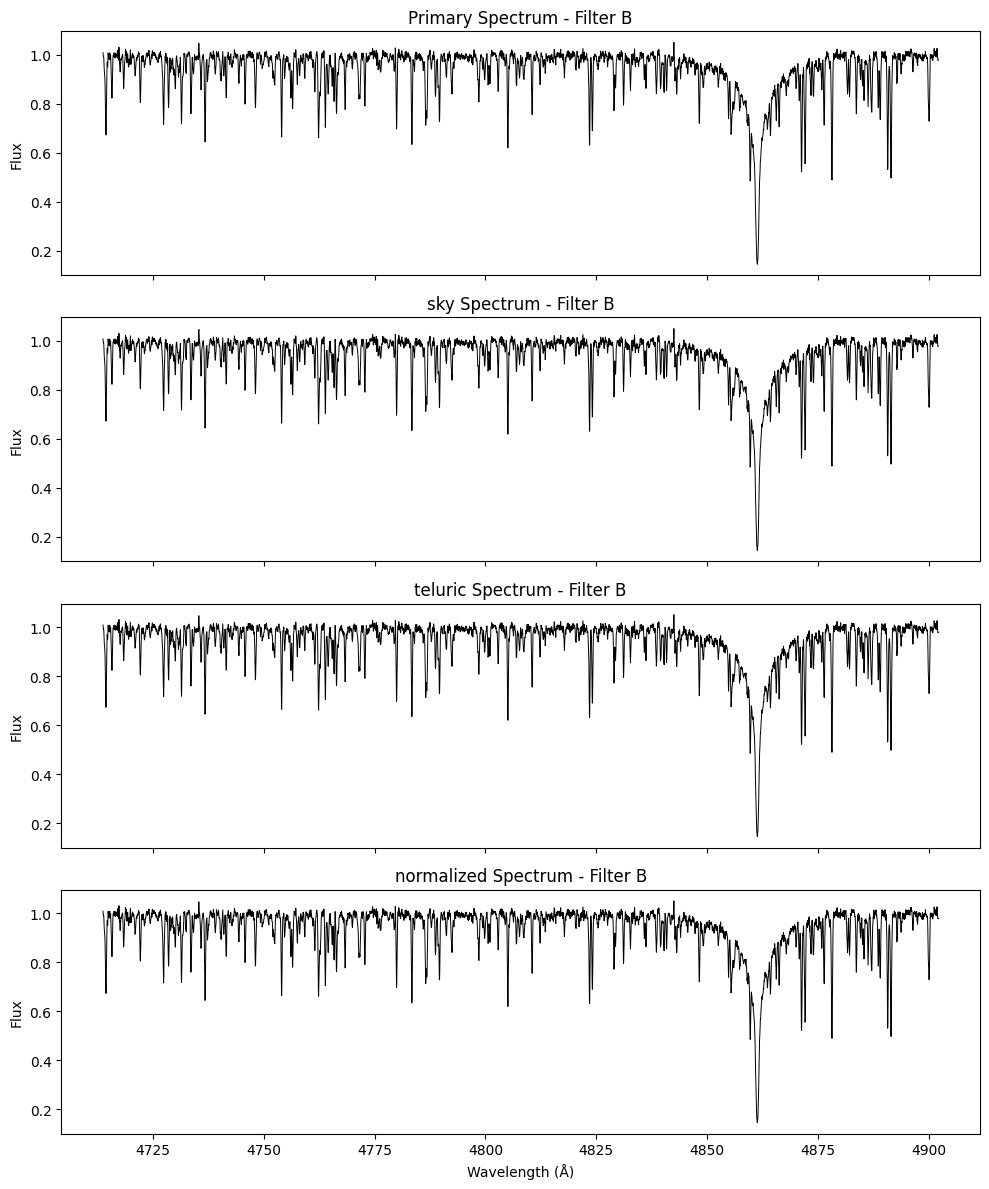

In [25]:
import matplotlib.pyplot as plt
from astropy.io import fits
from specutils import Spectrum1D
from astropy.visualization import quantity_support
from io import BytesIO
import requests

quantity_support()

# === SETTINGS ===
object_id = "170910004101116"
filt = "B"
subtypes = ["Primary", "sky", "teluric", "normalized"]
titles = ["Primary", "sky", "teluric", "normalized"]
base_url = "https://datacentral.org.au/vo/slink/links"

# === SETUP PLOTS ===
fig, axs = plt.subplots(len(subtypes), 1, figsize=(10, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

for i, subtype in enumerate(subtypes):
    ax = axs[i]
    url = (
        f"{base_url}?ID={object_id}&DR=galah_dr4&IDX=0"
        f"&FILT={filt}&DPSUBTYPE={subtype}&RESPONSEFORMAT=fits"
    )
    try:
        response = requests.get(url)
        print(url)
        response.raise_for_status()
        spec = Spectrum1D.read(BytesIO(response.content), format="wcs1d-fits")
        ax.plot(spec.wavelength, spec.flux, color='black', lw=0.7)
        ax.set_title(f"{titles[i]} Spectrum - Filter {filt}")
        ax.set_ylabel("Flux")
    except Exception as e:
        ax.set_title(f"{titles[i]} Spectrum - Filter {filt} (Unavailable)")
        ax.text(0.5, 0.5, "No data", transform=ax.transAxes,
                ha='center', va='center', fontsize=12, color='red')

axs[-1].set_xlabel("Wavelength (Å)")
plt.tight_layout()
plt.show()
